In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

<h3 style="color:green;">SCREENSHOT OF RUNNING SCENE IN FACTORY IO</h3>
<p>Factory I/O is a 3D factory simulation for learning automation technologies. Designed to be easy to use, it allows to quickly build a virtual factory using a selection of common industrial parts.

Factory I/O also includes many scenes inspired by typical industrial applications, ranging from beginner to advanced difficulty levels.

The most common scenario is to use Factory I/O as a PLC training platform since PLC are the most common controllers found in industrial applications. However, it can also be used with microcontrollers, SoftPLC, Modbus, among many other technologies.</p>

<a href="url">https://factoryio.com/</a>

![title](images/Conveyor.PNG)

<h3 style="color:green;">SCREENSHOT OF CONTROL IO CONFIGURATOR</h3>
<p>CONTROL I/O is an easy to use, brand independent SoftPLC, designed from the ground up for FACTORY I/O.<br> The goal of CONTROL I/O is to provide a simple and intuitive experience for anyone starting in the world of automation.</p>
<a href="url">https://docs.factoryio.com</a>

![title](images/Control_IO.PNG)

<h3 style="color:green;">Finding the ideal range of time between boxes using idealistic data<h3>
<p style="font-weight: normal;">Using exported tags from Factory IO to determine optimal working parameters for conveyor.</p>


In [2]:
#Importing the csv file created in factory io
#File currently contains 6 Columns and 682,211 Rows
data = pd.read_csv('data/normal.zip')
df = pd.DataFrame(data)

In [3]:
#Importing the csv file from factory io

#Commenting out block of code for local machine usage
#data = pd.read_csv('C:/Users/a.sethu/Desktop/Python/normal.csv')
#df = pd.DataFrame(data)

#Importing the csv file created in factory io
#File currently contains 6 Columns and 682,211 Rows
import zipfile
from zipfile import ZipFile
file_name = "data/normal.zip"
with ZipFile(file_name, 'r') as zip:
    # printing all the contents of the zip file
    zip.printdir()

File Name                                             Modified             Size
normal.csv                                     2021-03-24 15:46:14     16987297


<h3 style="color:green;">ISOLATING RELEVANT TAG DATA.<h3>
<p style="font-weight: normal;">For our purposes we only require the sensor data specific to the light array emitter.</p>


In [4]:
#Subseting all Light Array Emitter data
filteredLAE = df[df[' Name']=='Light Array Emitter 1 (Value)']
#using a copy to prevent index warning
filteredLAE = filteredLAE.copy()
#converting the current value column to numeric
filteredLAE[' Current Value'] = pd.to_numeric(filteredLAE[' Current Value'])

In [5]:
#using a copy to prevent index warning
filteredLAE = filteredLAE.copy()
filteredLAE[' Sensor Value Difference'] = filteredLAE[' Current Value'].diff()
filteredLAE

,Sensor/Actuator,Data Type,Name,Address,Current Value,Time Elapsed,Sensor Value Difference
5,Sensor,Int,Light Array Emitter 1 (Value),0,0,5.758350,NaN
20,Sensor,Int,Light Array Emitter 1 (Value),0,0,5.841684,0.0
35,Sensor,Int,Light Array Emitter 1 (Value),0,0,5.941685,0.0
50,Sensor,Int,Light Array Emitter 1 (Value),0,0,6.033353,0.0
65,Sensor,Int,Light Array Emitter 1 (Value),0,0,6.133354,0.0
...,...,...,...,...,...,...,...
316670,Sensor,Int,Light Array Emitter 1 (Value),0,0,2119.183000,0.0
316685,Sensor,Int,Light Array Emitter 1 (Value),0,0,2119.274000,0.0
316700,Sensor,Int,Light Array Emitter 1 (Value),0,0,2119.390000,0.0
316715,Sensor,Int,Light Array Emitter 1 (Value),0,0,2119.482000,0.0


In [6]:
#Filtering sensor trigger data points from the data by removing 
#all all data with current value = 0
filteredLAE = filteredLAE[filteredLAE[' Sensor Value Difference'] != 0]
filteredLAE = filteredLAE[filteredLAE[' Current Value']!=128 ]
filteredLAE = filteredLAE[filteredLAE[' Current Value']!=64 ]
#Dropping al NaN values
filteredLAE.dropna(subset = [' Sensor Value Difference'], inplace=True)
filteredLAE

,Sensor/Actuator,Data Type,Name,Address,Current Value,Time Elapsed,Sensor Value Difference
1775,Sensor,Int,Light Array Emitter 1 (Value),0,192,17.54989,192.0
2105,Sensor,Int,Light Array Emitter 1 (Value),0,0,19.74986,-192.0
2375,Sensor,Int,Light Array Emitter 1 (Value),0,192,21.54983,192.0
2705,Sensor,Int,Light Array Emitter 1 (Value),0,0,23.74980,-192.0
3065,Sensor,Int,Light Array Emitter 1 (Value),0,192,26.14976,192.0
...,...,...,...,...,...,...,...
314600,Sensor,Int,Light Array Emitter 1 (Value),0,0,2105.44500,-192.0
315350,Sensor,Int,Light Array Emitter 1 (Value),0,192,2110.41700,192.0
315665,Sensor,Int,Light Array Emitter 1 (Value),0,0,2112.51700,-192.0
316040,Sensor,Int,Light Array Emitter 1 (Value),0,192,2114.99900,192.0


In [7]:
filteredLAE[filteredLAE[' Sensor Value Difference'] > 0]
filteredLAE['Trigger Status']="Off"
filteredLAE['Trigger Status'] = filteredLAE.apply(lambda x: 'On' if x[' Sensor Value Difference']>0 else 'Off',axis=1)

In [8]:
filteredLAE['Trigger Interval'] = filteredLAE[" Time Elapsed"].diff(1)

In [9]:
preprocessedDF = filteredLAE[filteredLAE['Trigger Status']=='On']

In [10]:
#using a copy to prevent index warning
preprocessedDF = preprocessedDF.copy()
preprocessedDF['Trigger Interval'] = preprocessedDF[" Time Elapsed"].diff(1)
preprocessedDF.dropna(subset = ['Trigger Interval'], inplace=True)
preprocessedDF

,Sensor/Actuator,Data Type,Name,Address,Current Value,Time Elapsed,Sensor Value Difference,Trigger Status,Trigger Interval
2375,Sensor,Int,Light Array Emitter 1 (Value),0,192,21.54983,192.0,On,3.99994
3065,Sensor,Int,Light Array Emitter 1 (Value),0,192,26.14976,192.0,On,4.59993
3605,Sensor,Int,Light Array Emitter 1 (Value),0,192,29.74137,192.0,On,3.59161
4640,Sensor,Int,Light Array Emitter 1 (Value),0,192,36.64146,192.0,On,6.90009
5465,Sensor,Int,Light Array Emitter 1 (Value),0,192,42.13330,192.0,On,5.49184
...,...,...,...,...,...,...,...,...,...
312590,Sensor,Int,Light Array Emitter 1 (Value),0,192,2092.08900,192.0,On,3.57800
313595,Sensor,Int,Light Array Emitter 1 (Value),0,192,2098.76300,192.0,On,6.67400
314270,Sensor,Int,Light Array Emitter 1 (Value),0,192,2103.25300,192.0,On,4.49000
315350,Sensor,Int,Light Array Emitter 1 (Value),0,192,2110.41700,192.0,On,7.16400


([], [])

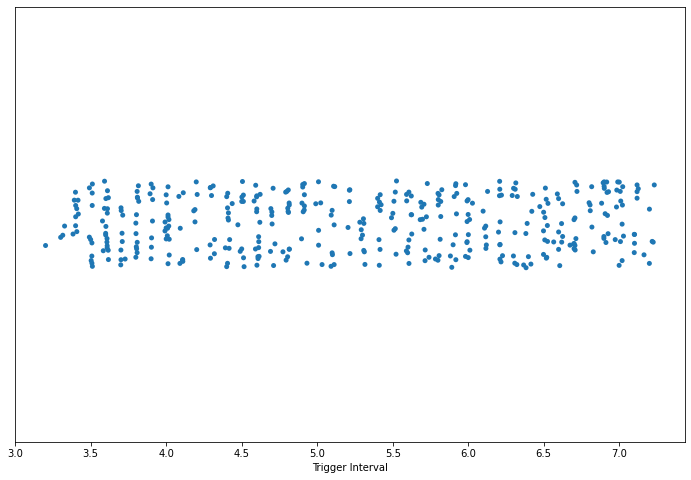

In [11]:
import numpy as np
import seaborn as sns
preprocessedDF=preprocessedDF.reset_index(drop=True)
plt.figure(figsize=(12,8)) #Plotting the data points on the plot
sns.stripplot(x='Trigger Interval',data = preprocessedDF,jitter= True,edgecolor = 'None')
sns.despine
locs,labels = plt.xticks()
plt.yticks([])

<h3 style="color:green;">Using Jenks Natural Optimisation Method for finding the range <h3>
<p style="font-weight: normal;">The Jenks optimization method, also called the Jenks natural breaks classification method, is a data clustering method designed to determine the best arrangement of values into different classes.
    </p>
<p style="font-weight: normal;">This is done by seeking to minimize each class's average deviation from the class mean, while maximizing each class's deviation from the means of the other classes.
</p>

In [12]:
import jenkspy
#Finding the breaks using the Jenks natural breaks optimzation method
breaks = jenkspy.jenks_breaks(preprocessedDF['Trigger Interval'],nb_class = 3)

In [13]:
breaks

[3.201000000000022, 4.515600000000006, 5.8250000000000455, 7.231999999999971]

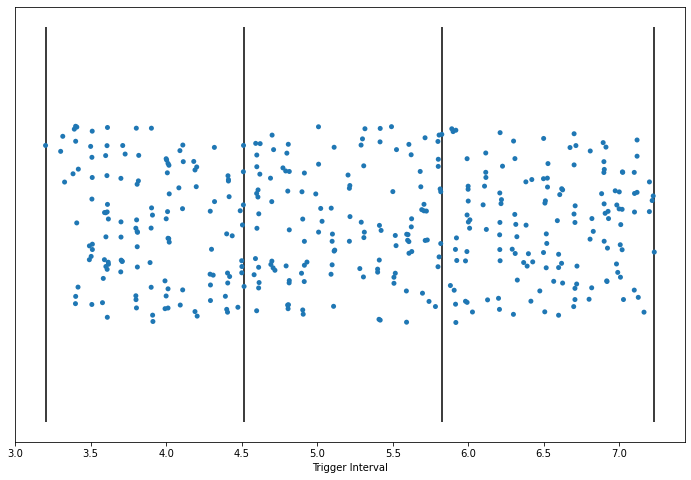

In [14]:
#seaborn library for plotting
import seaborn as sns
plt.figure(figsize=(12,8)) #Plotting the data points on the plot
sns.stripplot(x='Trigger Interval',data = preprocessedDF,jitter= True,edgecolor = 'None')
sns.despine
locs,labels = plt.xticks()
plt.yticks([])
#Drawing vertical lines usng the data points as x values
for b in breaks:
    plt.vlines(b,ymin= -0.2,ymax=0.2,color='k')

<h3 style="color:green;">Conclusion<h3>
<p style="font-weight: normal;">The range obtained from JNBO indicates that the ideal range lies between 4.5 and 5.8.</p>

In [15]:
rangeIndexStart = int(len(breaks)/2)
download_list = []
download_list.append(breaks[rangeIndexStart-1])
download_list.append(breaks[rangeIndexStart])
#Downloading the range of values at the center of the plot
import pickle
filename = 'data/finalized_model.sav'
pickle.dump(download_list, open(filename, 'wb'))